<a href="https://colab.research.google.com/github/AjagTerbang/ComputerVision/blob/main/Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get Data

In [ ]:
# Langkah 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Langkah 2: Membagi Dataset Menjadi Train dan Validation
import os
import shutil
import random

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data Set Directory


In [ ]:
# Path ke dataset asli
dataset_dir = '/content/drive/MyDrive/Computer Vision/Dataset'
is_folder = os.listdir(dataset_dir)
print(is_folder)
# Path untuk folder train dan validation
train_dir = '/content/drive/MyDrive/Computer Vision/Dataset/train'
validation_dir = '/content/drive/MyDrive/Computer Vision/Dataset/validation'

['motorcycle', 'car', 'bus', 'truck']


In [ ]:



# Buat folder train dan validation jika belum ada
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)

# Daftar kelas
classes = ['car', 'bus', 'motorcycle', 'truck']

# Fungsi untuk membagi dataset
def split_dataset(dataset_dir, train_dir, validation_dir, classes, train_ratio=0.8):
    for class_name in classes:
        class_dir = os.path.join(dataset_dir, class_name)
        train_class_dir = os.path.join(train_dir, class_name)
        validation_class_dir = os.path.join(validation_dir, class_name)

        os.makedirs(train_class_dir, exist_ok=True)
        os.makedirs(validation_class_dir, exist_ok=True)

        images = os.listdir(class_dir)
        random.shuffle(images)

        split_index = int(len(images) * train_ratio)
        train_images = images[:split_index]
        validation_images = images[split_index:]

        for image in train_images:
            shutil.copy(os.path.join(class_dir, image), os.path.join(train_class_dir, image))

        for image in validation_images:
            shutil.copy(os.path.join(class_dir, image), os.path.join(validation_class_dir, image))

# Memanggil fungsi untuk membagi dataset
split_dataset(dataset_dir, train_dir, validation_dir, classes)

# Verifikasi isi dataset
print("Train Directory:")
print(os.listdir(train_dir))
print("Validation Directory:")
print(os.listdir(validation_dir))

Train Directory:
['car', 'bus', 'motorcycle', 'truck']
Validation Directory:
['car', 'bus', 'motorcycle', 'truck']


#Check GPU

In [ ]:
!nvidia-smi

Wed Jan  8 08:58:36 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

#Augmentation

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
# Langkah 5: Visualisasi Hasil Training
import matplotlib.pyplot as plt

In [ ]:
# Langkah 3: Melakukan Data Augmentation dan Pembuatan Model CNN


# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical'
)


Found 320 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


In [ ]:
def show_augmented_images(generator, num_images=5):
    x_batch, y_batch = next(generator)
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    for i in range(num_images):
        axes[i].imshow(x_batch[i])
        axes[i].axis('off')
    plt.show()

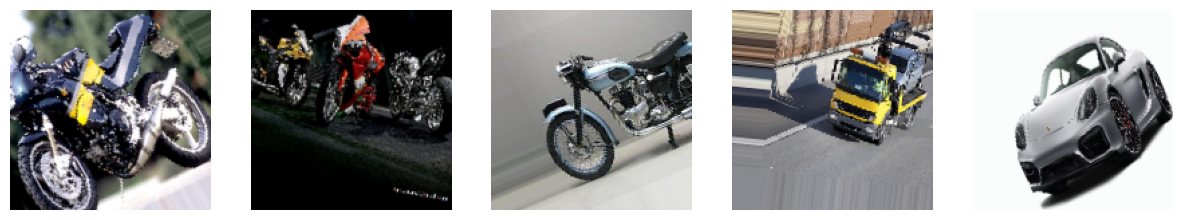

In [ ]:
show_augmented_images(train_generator)

#Model CNN

In [ ]:

# Membuat model CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 kelas: car, bus, motorcycle, truck
])

# Compile model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,035,716 (72.62 MB)

 Trainable params: 19,035,716 (72.62 MB)

 Non-trainable params: 0 (0.00 B)

#Training Model

In [ ]:
# Langkah 5: Melatih Model
from tensorflow.keras.callbacks import EarlyStopping

# Callback untuk early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
# Melatih model
history = model.fit(
    train_generator,
    # steps_per_epoch=train_generator.samples//train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    # validation_steps=validation_generator.samples // validation_generator.batch_size + 1,
    callbacks=[early_stopping],
)


Epoch 1/20
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - accuracy: 0.6266 - loss: 0.9369

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 399ms/step - accuracy: 0.6196 - loss: 0.9427 - val_accuracy: 0.6000 - val_loss: 1.1344
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 323ms/step - accuracy: 0.5934 - loss: 0.9176 - val_accuracy: 0.4250 - val_loss: 1.8098
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 434ms/step - accuracy: 0.5314 - loss: 0.9818 - val_accuracy: 0.5750 - val_loss: 1.2020
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 501ms/step - accuracy: 0.6437 - loss: 0.8986 - val_accuracy: 0.7125 - val_loss: 0.9729
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 342ms/step - accuracy: 0.7105 - loss: 0.8271 - val_accuracy: 0.4625 - val_loss: 1.7057


In [ ]:
# Langkah 4: Menyimpan Model dalam Format .keras dan .tflite

# Simpan model dalam format .keras
model.save('vehicle_classification_model.keras')

# Konversi model ke format .tflite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model .tflite
with open('vehicle_classification_model.tflite', 'wb') as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmpsk_09alc'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  132255063727920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132255103262512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132255103269904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132255103267968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132255103270080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132255103267792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132255063728976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132255065164256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132255125506352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132255063981600: TensorSpec(shape=(), dtype=tf.resource, name=None)


#Report

In [ ]:
   import numpy as np
   import matplotlib.pyplot as plt
   import seaborn as sns
   from sklearn.metrics import confusion_matrix
   from sklearn.metrics import f1_score


In [ ]:
predictions = model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = validation_generator.classes

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 226ms/step


In [ ]:
f1 = f1_score(true_classes, predicted_classes, average='weighted')
print(f"F1 Score: {f1}")

F1 Score: 0.22806223704056522


In [ ]:
cm = confusion_matrix(true_classes, predicted_classes)


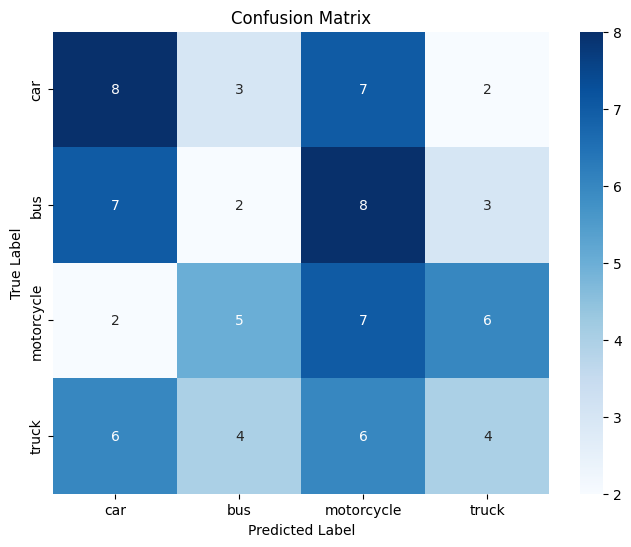

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

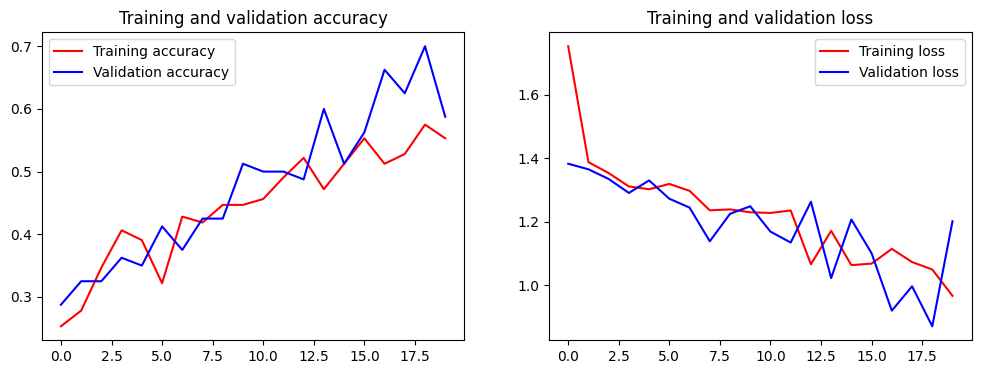

In [ ]:


# Plot akurasi dan loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(len(acc))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


#